# 1.0 Imports

In [ ]:
from utils import *

# 2.0 Set Globals & Functions

In [2]:
def checkData(x):
    print(f"\nInfo dos valores:\n")
    print(x.info())
    print(f"\nDescrição dos dados:\n\n{x.describe()}")
    return

def checkNaN(x):
    # Recebe um DataFrame e retorna a quantidade de valores nulos e não nulos.
    null_count = x.isna().sum()
    non_null_count = x.notnull().sum()
    print(f"Null values:\n {null_count}")
    print(f"Non-null values:\n {non_null_count}")
    return

def checkOutliers(x):
    """Recebe um DataFrame e retorna um DataFrame com os outliers.
    Baseia-se no pressuposto de que os dados estão normalmente distribuídos."""
    dfOutliers  = pd.DataFrame()
    # Itera sobre as colunas númericas
    for column in x.select_dtypes(include=[np.number]).columns:
        # Calcula o 1 quartil (Q1)
        Q1 = x[column].quantile(0.25)
        # Calcula o 3 quartil (Q3)
        Q3 = x[column].quantile(0.75)
        # Calcula o Intervalo Interquartil (IQR)
        IQR = Q3 - Q1
        # Define os limites inferior e superior para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identica os outliers da coluna atual e adiciona ao DataFrame de outliers
        outliers = x[(x[column] < lower_bound) | (x[column] > upper_bound)]
        # Concatene os outliers da coluna atual ao DataFrame de outliers
        dfOutliers = pd.concat([dfOutliers, outliers])
    outliersData = dfOutliers.drop_duplicates().reset_index(drop=True)
    return outliersData

def corr(x):
    plt.figure(figsize=(10,8))
    sns.heatmap(x.select_dtypes(include=[np.number]).corr(), annot=True)
    plt.show()
    return

def hist(x):
    # Recebe um DataFrame e plota um histograma para cada coluna numérica.
    x.hist(bins=50, figsize=(25,10))
    plt.show()
    return




# 3.0 Carregamento e Checagem

In [3]:
df_raw = pd.read_csv("train.csv")

In [4]:
checkData(df_raw)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4467 non-null   object 
 1   Delivery_person_ID           4467 non-null   object 
 2   Delivery_person_Age          4467 non-null   object 
 3   Delivery_person_Ratings      4467 non-null   object 
 4   Restaurant_latitude          4467 non-null   float64
 5   Restaurant_longitude         4467 non-null   float64
 6   Delivery_location_latitude   4467 non-null   float64
 7   Delivery_location_longitude  4467 non-null   float64
 8   Order_Date                   4467 non-null   object 
 9   Time_Orderd                  4467 non-null   object 
 10  Time_Order_picked            4467 non-null   object 
 11  Weatherconditions            4467 non-null   object 
 12  Road_traffic_density         4467 non-null   object 
 13

In [5]:
df_raw.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
2991,0xde2b,KOLRES08DEL02,20,4.5,22.537960,88.349843,22.557960,88.369843,15-02-2022,08:20:00,08:35:00,conditions Stormy,Low,1,Snack,motorcycle,0,No,Metropolitian,(min) 14
943,0xa80b,SURRES08DEL02,34,4.6,21.173343,72.792731,21.223343,72.842731,03-03-2022,00:00:00,00:15:00,conditions Cloudy,Low,1,Meal,motorcycle,1,No,Urban,(min) 19
185,0x33a4,CHENRES15DEL03,35,4.7,13.026286,80.275235,13.056286,80.305235,21-03-2022,21:20:00,21:30:00,conditions Fog,Jam,1,Drinks,motorcycle,1,No,Metropolitian,(min) 34
4409,0x99e3,JAPRES09DEL01,21,4.7,26.911378,75.789034,26.981378,75.859034,12-03-2022,19:00:00,19:10:00,conditions Sunny,Medium,0,Meal,motorcycle,0,No,Metropolitian,(min) 22
3887,0xdad,MUMRES010DEL02,29,4.8,19.003517,72.827650,19.083517,72.907650,12-03-2022,20:20:00,20:35:00,conditions Stormy,Jam,0,Snack,motorcycle,1,No,Metropolitian,(min) 27
4123,0x4a2d,SURRES19DEL01,35,4.9,21.149669,72.772629,21.189669,72.812629,17-03-2022,13:40:00,13:50:00,conditions Stormy,High,0,Meal,motorcycle,1,No,Metropolitian,(min) 34
3034,0xb2dc,VADRES08DEL02,26,4.7,0.000000,0.000000,0.080000,0.080000,06-04-2022,23:35:00,23:40:00,conditions Cloudy,Low,0,Meal,motorcycle,NaN,No,Urban,(min) 21
3279,0x5924,HYDRES09DEL01,33,4.6,17.431668,78.408321,17.471668,78.448321,28-03-2022,16:40:00,16:50:00,conditions Sunny,Medium,2,Meal,electric_scooter,0,No,Urban,(min) 19
3379,0x9167,CHENRES03DEL01,35,4.7,13.091809,80.219104,13.101809,80.229104,19-03-2022,10:35:00,10:40:00,conditions Fog,Low,0,Snack,motorcycle,1,No,Metropolitian,(min) 28
632,0x4340,RANCHIRES20DEL02,21,5,23.399250,85.390464,23.479250,85.470464,12-03-2022,22:35:00,22:40:00,conditions Sandstorms,Low,1,Meal,scooter,0,No,Urban,(min) 11


# 4.0 Limpeza & Transansformação

Claramente algumas colunas possuem valores NaN, mas eles não estão aparecendo na checagem de NaNs. Isso pode ser porque eles são do tipo objeto ou estão armazenados como string e possuem algum formato estranho como " NaN", com um espaço em branco.<br>Os primeiros passos serão: remover todos os espaços das colunas com string, convertê-las para o tipo apropriado e remover excesso de NaNs.

## 4.1 Remover espaços & Corrigir tipos de dados e erros de escrita

In [6]:
df_clear = df_raw.copy()
# Remover espaços em branco no início e no final das strings
df_clear = df_clear.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Converter para tipos númericos onde for necessario
df_clear["Delivery_person_Age"] = df_clear["Delivery_person_Age"].apply(pd.to_numeric, errors="coerce").astype("Int64")
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].apply(pd.to_numeric, errors="coerce")
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].apply(pd.to_numeric, errors="coerce").astype("Int64")
# Corrigir erro de escrita em colunas
df_clear.rename(columns={"Time_Orderd": "Time_Ordered"}, inplace=True)
# Corrigir erro de escrita em valores
df_clear["City"] = df_clear["City"].str.replace("Metropolitian", "Metropolitan", regex=False)
# Converter para tipo date.time para melhor manipulá-los
df_clear["Order_Date"] = pd.to_datetime(df_clear["Order_Date"], format="%d-%m-%Y").astype("string")
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Time_Ordered"], format="%H:%M:%S").dt.time.astype("string")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear["Time_Order_picked"], format="%H:%M:%S").dt.time.astype("string")
# Remover letras da coluna "Time_taken(min)" e conberter tipo para "Int64"
df_clear["Time_taken(min)"] = df_clear["Time_taken(min)"].str.extract(r'(\d+)').astype("Int64")
# Remover excesso de palavras na coluna "Weatherconditions"
df_clear["Weatherconditions"] = df_clear["Weatherconditions"].str.replace("conditions ", "", regex=False)
# Mudar NaNs para "Unknown" em colunas que não guardam valores numéricos
df_clear["Weatherconditions"] = df_clear["Weatherconditions"].str.replace("NaN", "Unknown", regex=False)
df_clear["Road_traffic_density"] = df_clear["Road_traffic_density"].str.replace("NaN", "Unknown", regex=False)
df_clear["City"] = df_clear["City"].str.replace("NaN", "Unknown", regex=False)
df_clear["Festival"] = df_clear["Festival"].str.replace("NaN", "Unknown", regex=False)


In [7]:
print(f"Max rating: {df_clear["Delivery_person_Ratings"].max()}\nMin rating: {df_clear["Delivery_person_Ratings"].min()}")
df_clear[df_clear["Delivery_person_Ratings"] > 5.0]

Max rating: 6.0
Min rating: 1.0


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
3586,0x46d,BANGRES05DEL01,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,<NA>,12:30:00,Unknown,Unknown,3,Meal,electric_scooter,0,No,Urban,25


Há um valor de avaliação de 6,0. Como há apenas um valor "errado" e, assumindo que o máximo é 5 "estrelas", ele será corrigido para 5.

In [8]:
df_clear.loc[df_clear["Delivery_person_Ratings"] > 5.0, "Delivery_person_Ratings"] = 5.0

## 4.2 Remover excesso de NaNs

In [9]:
# Para manter a análise simples, linhas com mais de 2 NaNs serão removidas, o que dá ~5% dos dados
df_clear = df_clear.dropna(thresh=len(df_clear.columns) - 2).reset_index(drop=True)
# Há somente 1 NaN em "Time_taken(min)", que será substituído removido pois o trabalho para estipula-lo não é viável
df_clear = df_clear.dropna(subset=["Time_taken(min)"]).reset_index(drop=True)

In [10]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4291 non-null   object 
 1   Delivery_person_ID           4291 non-null   object 
 2   Delivery_person_Age          4277 non-null   Int64  
 3   Delivery_person_Ratings      4271 non-null   float64
 4   Restaurant_latitude          4291 non-null   float64
 5   Restaurant_longitude         4291 non-null   float64
 6   Delivery_location_latitude   4291 non-null   float64
 7   Delivery_location_longitude  4291 non-null   float64
 8   Order_Date                   4291 non-null   string 
 9   Time_Ordered                 4287 non-null   string 
 10  Time_Order_picked            4291 non-null   string 
 11  Weatherconditions            4291 non-null   object 
 12  Road_traffic_density         4291 non-null   object 
 13

## 4.3 Unir coordenadas em uma tupla em nova coluna

Para melhor trabalhar com as coordenadas, elas serão armazenadas como uma tupla.


In [11]:
df_clear["Restaurant_location"] = list(zip(df_clear["Restaurant_latitude"], df_clear["Restaurant_longitude"]))
df_clear["Delivery_location"] = list(zip(df_clear["Delivery_location_latitude"], df_clear["Delivery_location_longitude"]))
df_clear.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], inplace=True)

## 4.4 Unir datas e horas

Para melhor trabalhar com o tempo, "Order_date" será unido com "Time_Ordered" e "Time_Order_picked". Pelo mesmo motivo, "Time_taken(min)" será transformado em um date.time baseado em "Time_Order_picked" + "Time_taken(min)".

In [12]:
# Une as colunas de data e hora para uma melhor manipulação
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Order_Date"] + " " + df_clear["Time_Ordered"], format="%Y-%m-%d %H:%M:%S")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear['Order_Date'] + " " + df_clear["Time_Order_picked"], format="%Y-%m-%d %H:%M:%S")
# Adiciona 1 dia para pedidos feitos antes da meia noite e entregues depois da meia
df_clear["Time_Order_picked"] = df_clear.apply(lambda row: row["Time_Order_picked"] + pd.Timedelta(days=1) if row["Time_Ordered"] > row["Time_Order_picked"] else row["Time_Order_picked"], axis=1)
# Calcula a hora da entrega baseado em Time_order_pick + time_taken
df_clear["Time_Order_delivered"] = df_clear["Time_Order_picked"] + pd.to_timedelta(df_clear["Time_taken(min)"], unit="m")
# Remove as colunas originais de data e tempo
df_clear.drop(["Order_Date", "Time_taken(min)"], axis=1, inplace=True)

## 4.5 Preenchendo NaNs

In [13]:
print(f'Mediana de "Delivery_person_Age": {df_clear['Delivery_person_Age'].median()}')
print(f'Média de "Delivery_person_Age": {df_clear['Delivery_person_Age'].mean()}')

Mediana de "Delivery_person_Age": 29.0
Média de "Delivery_person_Age": 29.449614215571664


A coluna "Delivery_person_Age" possui o valor de ~29 tanto para a mediana quanto para a média, então vamos preencher os NaNs com a mediana, pois é um Int e a média é um float.<br>Uma abordagem melhor seria aplicar um método como "KNN", mas neste exercício vamos nos manter no simples.

In [14]:
df_clear["Delivery_person_Age"] = df_clear['Delivery_person_Age'].fillna(df_clear['Delivery_person_Age'].median())

"Delivery_person_Ratings" pode ser preenchido com a média baseada no "Delivery_person_ID".

In [15]:
df_aux = df_clear[["Delivery_person_ID", "Delivery_person_Ratings"]].dropna()
df_aux = df_aux.groupby(["Delivery_person_ID"]).mean().reset_index()
df_clear = df_clear.merge(df_aux, on="Delivery_person_ID", how="left", suffixes=('', '_mean'))
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].fillna(df_clear["Delivery_person_Ratings_mean"])
df_clear.drop(columns=["Delivery_person_Ratings_mean"], inplace=True)

NaNs em "Time_ordered" podem ser preenchidos com base nos outros pedidos, agrupados pelo tipo de pedido.<br>A suposição aqui é que as refeições provavelmente têm um tempo de preparo mais longo do que o buffet, que tem um tempo mais longo do que as bebidas, que têm um tempo mais longo do que as lanches.

In [16]:
df_aux = df_clear[["Time_Ordered", "Time_Order_picked", "Time_Order_delivered", "Type_of_order"]].dropna()
df_aux["Time_to_pick"] = (df_aux["Time_Order_picked"] - df_aux["Time_Ordered"]).dt.total_seconds() / 60
df_aux["Time_to_delivery"] = (df_aux["Time_Order_delivered"] - df_aux["Time_Order_picked"]).dt.total_seconds() / 60
df_aux = df_aux.drop(columns=["Time_Ordered", "Time_Order_picked", "Time_Order_delivered"])
df_times_grouped = df_aux.groupby(["Type_of_order"]).agg(["mean", "median"]).reset_index()
df_times_grouped

Type_of_order Time_to_pick        Time_to_delivery       
                        mean median             mean median
0        Buffet     9.781784   10.0        26.122391   25.0
1        Drinks     9.841954   10.0        26.286398   25.5
2          Meal    10.032110   10.0        26.225688   25.0
3         Snack     9.977252   10.0        26.482257   26.0

A suposição não foi exatamente verdadeira, mas a mediana de "Time_to_pick" pode ser usada para calcular quando os pedidos com NaNs foram feitos sem muita distorção nos dados.

In [17]:
df_clear["Time_Ordered"] = df_clear["Time_Ordered"].fillna(df_clear["Time_Order_picked"] - pd.to_timedelta(df_times_grouped.loc[0, ("Time_to_pick", "median")], unit="m"))

Em "multiple_delivery", a suposição é: se não é uma entrega múltipla, essa entrada não foi preenchida, então os NaNs serão preenchidos com 1.

In [18]:
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].fillna(1)

In [19]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       4291 non-null   object        
 1   Delivery_person_ID       4291 non-null   object        
 2   Delivery_person_Age      4291 non-null   Int64         
 3   Delivery_person_Ratings  4291 non-null   float64       
 4   Time_Ordered             4291 non-null   datetime64[ns]
 5   Time_Order_picked        4291 non-null   datetime64[ns]
 6   Weatherconditions        4291 non-null   object        
 7   Road_traffic_density     4291 non-null   object        
 8   Vehicle_condition        4291 non-null   int64         
 9   Type_of_order            4291 non-null   object        
 10  Type_of_vehicle          4291 non-null   object        
 11  multiple_deliveries      4291 non-null   Int64         
 12  Festival      

# 5.0 Análise descritiva

## 5.1 Primeiras KBQs
Por enquanto, as perguntas de négocio serão respondidas sem o uso de técnicas intermediárias/avançadas como groupby, agg, plotting, machine learning, etc...

### 1. Qual o número total de entregas cadastradas na base de dados?
**Resposta:** O número total de entregas cadastrados na base de dados é 4291.

In [20]:
len(df_clear)

4291

### 2. Quantos entregadores únicos existem na base de dados?
**Resposta:** Há 1131 IDs únicos na base de dados, porem aparentemente não são entregadores, mas sim empresas que oferecem o serviço de entrega, pois há multiplas idades para o mesmo ID de entregador.

Primeiramente foi notado nos datasets abaixo que há multiplas idades para o mesmo ID de entregador, o que sugere que provavelmente o ID não é do entregador, mas provavelmente da empresa que oferece o serviço de entrega.
Note que, apesar de não ser usado técnicas como groupby e agg, foi aberto uma exceção para o código abaixo, pois ele não visa responder a pergunta, mas sim apontar uma inconsistência na base de dados.

In [21]:
df_aux = df_clear[["Delivery_person_ID", "Delivery_person_Age"]].dropna()
df_age_grouped = df_aux.groupby(["Delivery_person_ID"]).agg(["count"]).reset_index()
df_age_grouped

,Delivery_person_ID,Delivery_person_Age
,,count
0,AGRRES010DEL01,1
1,AGRRES010DEL02,2
2,AGRRES01DEL02,1
3,AGRRES01DEL03,1
4,AGRRES02DEL02,1
...,...,...
1126,VADRES19DEL02,7
1127,VADRES19DEL03,5
1128,VADRES20DEL01,5


In [22]:
df_clear.loc[df_clear['Delivery_person_ID'] == 'VADRES19DEL02', ["Delivery_person_ID", "Delivery_person_Age"]]

,Delivery_person_ID,Delivery_person_Age
921,VADRES19DEL02,38
2160,VADRES19DEL02,33
2972,VADRES19DEL02,34
3091,VADRES19DEL02,28
3326,VADRES19DEL02,36
3390,VADRES19DEL02,28
4205,VADRES19DEL02,38


Portanto será tratado como "ID único" e não "entregador único".

In [23]:
# Get the size of the unique values in the column Delivery_person_ID
len(df_clear["Delivery_person_ID"].unique())

1131

### 3. Qual a idade do entregador mais velho? E do mais novo?
**Resposta:** A maior idadeade é 50 anos e a menor idade é 15 anos.

In [24]:
df_clear["Delivery_person_Age"].sort_values(ascending=True)

2292    15
2787    15
2833    15
1944    20
3031    20
        ..
65      39
2976    39
3029    39
4277    39
3448    50
Name: Delivery_person_Age, Length: 4291, dtype: Int64

### 4. Qual o ID do entregador com a maior idade? E o ID do entregador com a menor idade?
**Resposta:** O ID do entregador mais velho é "BANGRES05DEL01" e o ID do entregador mais novo é "JAPRES15DEL03".

In [25]:
max_age_row = df_clear.loc[df_clear["Delivery_person_Age"].idxmax()]
min_age_row = df_clear.loc[df_clear["Delivery_person_Age"].idxmin()]
age_max_min = {
    "max": {
        "Delivery_person_ID": str(max_age_row["Delivery_person_ID"]),
        "Delivery_person_Age": int(max_age_row["Delivery_person_Age"])
    },
    "min": {
        "Delivery_person_ID": str(min_age_row["Delivery_person_ID"]),
        "Delivery_person_Age": int(min_age_row["Delivery_person_Age"])
    }
}
age_max_min


{'max': {'Delivery_person_ID': 'BANGRES05DEL01', 'Delivery_person_Age': 50},
 'min': {'Delivery_person_ID': 'JAPRES15DEL03', 'Delivery_person_Age': 15}}

### 5. Quais os nomes das condições climáticas?
**Resposta:** As condições climáticas são: 
- "Sunny"
- "Stormy"
- "Sandstorms"
- "Cloudy"
- "Fog"
- "Windy"
- "Unknown".

Lembrando que "Unknown" foi criado para conter os valores nulos da coluna.

In [26]:
df_clear["Weatherconditions"].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy',
       'Unknown'], dtype=object)

### 6. Quantas entregas foram realizadas sob condições climáticas de tempestade de areia (Sandstorms)?
**Resposta:** Foram feitas 697 entregas com a condição "Sandstorms".

In [27]:
len(df_clear.loc[df_clear["Weatherconditions"] == "Sandstorms", "Weatherconditions"])

697

### 7. Quais eram as condicões climáticas da data mais recente de entrega?
**Resposta:** A condição climática da data mais recente de entrega foi "Fog" (Neblina).

In [28]:
df_clear.loc[df_clear["Time_Order_delivered"] == df_clear["Time_Order_delivered"].max(), "Weatherconditions"]

1288    Fog
Name: Weatherconditions, dtype: object

### 8. Quantos tipos de densidade de trânsito existem na base de dados? Quais os nomes delas?
**Resposta:** Existem 5 tipos de densidade de trânsito na base de dados:
- High
- Jam
- Low
- Medium
- Unknown

Lembrando que "Unknown" foi criado para conter os valores nulos da coluna.

In [29]:
print(f"{len(df_clear["Road_traffic_density"].unique())} tipos de densidade.\n{df_clear["Road_traffic_density"].unique()}.")

5 tipos de densidade.
['High' 'Jam' 'Low' 'Medium' 'Unknown'].


### 9. Quantas entregas foram feitas em cada condição climática?
**Resposta:** A quantidade de entregas feitas em cada condição climática é: 
1. Fog: 758
2. Windy: 725
3. Cloudy: 707
4. Stormy: 704
5. Sandstorms: 697
6. Sunny: 696
7. Unknown: 4

In [30]:
for condition in df_clear["Weatherconditions"].unique():
    print(f"{condition}: {len(df_clear.loc[df_clear["Weatherconditions"] == condition, "Weatherconditions"])}")

Sunny: 696
Stormy: 704
Sandstorms: 697
Cloudy: 707
Fog: 758
Windy: 725
Unknown: 4


### 10. Quantos entregadores únicos fizeram entregas em cada condição climática?
**Resposta:** A quantidade de entregadores únicos que fizeram entregas em cada condição climática é: 
1. Sunny: 529
2. Windy: 523
3. Cloudy: 520
4. Fog: 511
5. Stormy: 504
6. Sandstorms: 504
7. Unknown: 4

In [31]:
for condition in df_clear["Weatherconditions"].unique():
    print(f"{condition}: {df_clear.loc[df_clear["Weatherconditions"] == condition, "Delivery_person_ID"].nunique()}")

Sunny: 529
Stormy: 504
Sandstorms: 504
Cloudy: 520
Fog: 511
Windy: 523
Unknown: 4


### 11. Quantas entregas foram feitas em cada tipo de densidade de trânsito?
**Resposta:** A quantidade de entregas feitas em cada condição de transito é: 
1. Low: 1504
2. Jam: 1303
3. Medium: 1059
4. High: 421
5. Unknown: 4

In [32]:
for condition in df_clear["Road_traffic_density"].unique():
    print(f"{condition}: {len(df_clear.loc[df_clear["Road_traffic_density"] == condition, "Road_traffic_density"])}")

High: 421
Jam: 1303
Low: 1504
Medium: 1059
Unknown: 4


### 12. Quantos entregadores únicos fizeram entregas em cada tipo de densidade de trânsito?
**Resposta:** A quantidade de entregadores únicos que fizeram entregas em cada densidade de trânsito é: 
1. Low: 784
2. Jam: 740
3. Medium: 649
4. High: 293
5. Unknown: 4

In [33]:
for condition in df_clear["Road_traffic_density"].unique():
    print(f"{condition}: {df_clear.loc[df_clear["Road_traffic_density"] == condition, "Delivery_person_ID"].nunique()}")

High: 293
Jam: 740
Low: 784
Medium: 649
Unknown: 4


### 13. Quantos tipos de cidades únicas existem na base? Quais são os seus nomes?
***Resposta:*** Há 4 tipos de cidades únicas na base e seus nomes são: 
- Urban
- Metropolitian
- Semi-Urban
- Unknown

In [34]:
print(f"Há {len(df_clear["City"].unique())} tipos de cidades únicas na base e seus nomes são: {df_clear["City"].unique()}.")

Há 4 tipos de cidades únicas na base e seus nomes são: ['Urban' 'Metropolitan' 'Semi-Urban' 'Unknown'].


### 14. Quantos tipos de veículos únicos existem na base? Quais são seus nomes?
***Resposta:*** Há 4 tipos de veículos únicos na base e seus nomes são:
- Bicycle
- scooter
- motorcycle
- electric_scooter

In [35]:
print(f"Há {len(df_clear["Type_of_vehicle"].unique())} tipos de veículos únicos na base e seus nomes são: {df_clear["Type_of_vehicle"].unique()}.")

Há 4 tipos de veículos únicos na base e seus nomes são: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle'].


### 15. Qual o tipo de veículo que mais vez entregas com a condição de trânsito pesado (High)?
***Resposta:*** O tipo de veículo que mais fez entregas com a condição de trânsito pesado foi motorcycle, com 250 entregas.

In [36]:
df_clear.loc[df_clear["Road_traffic_density"] == "High", "Type_of_vehicle"].value_counts()

Type_of_vehicle
motorcycle          250
scooter             140
electric_scooter     31
Name: count, dtype: int64

### 16. Qual o tipo de pedido mais feito durante condições climáticas de tempestade de areia?
***Resposta:*** O tipo de pedido mas feito durante a condição climáticas de tempestade de areia foi meal, com 193 entregas.

In [37]:
df_clear.loc[df_clear["Weatherconditions"] == "Sandstorms", "Type_of_order"].value_counts()

Type_of_order
Meal      193
Snack     182
Buffet    161
Drinks    161
Name: count, dtype: int64

### 17. Qual o tipo de cidade com o maior número de pedidos de Bebidas (Drinks) feito em Scooter?
***Resposta:*** O tipo de cidade com o maior número de pedidos de bebidas feito em scooter foi Metropolitan, com 260 pedidos.

In [38]:
df_clear.loc[(df_clear["Type_of_order"] == "Drinks") & (df_clear["Type_of_vehicle"] == "scooter"), "City"].value_counts()

City
Metropolitan    260
Urban            75
Unknown          15
Name: count, dtype: int64

### 18. Qual o tipo de cidade com o (os) entregador mais velho? E o nome da cidade com o (os) entregadores mais novos?
***Resposta:*** O tipo de cidade com o entregador mais velho é Urban e o tipo de cidade com 2 dos 3 entregadores mais novos é Metropolitan.

In [39]:
df_clear.loc[df_clear["Delivery_person_Age"] == df_clear["Delivery_person_Age"].max(), "City"]

3448    Urban
Name: City, dtype: object

Há um unico entregador mais velho, que está no tipo de cidade Urban.

In [40]:
df_clear.loc[df_clear["Delivery_person_Age"] == df_clear["Delivery_person_Age"].min(), "City"]

2292           Urban
2787    Metropolitan
2833    Metropolitan
Name: City, dtype: object

Há 3 entregadores mais novos, onde 2 estão no tipo de cidade Metropolitan.

### 19. Quantas entregas foram feitas durante o Festival?
***Resposta:*** Foram feitas 91 entregas durante o Festival.

In [41]:
len(df_clear.loc[df_clear["Festival"] == "Yes", "ID"])

91

### 20. Quantos tipos de cidades únicas tiveram entregas feitas durante o Festival?
***Resposta:*** Houve 4 tipos de cidades únicas que tiveram entregas feitas durante o Festival.

In [42]:
df_clear.loc[df_clear["Festival"] == "Yes", "City"].nunique()

4

### 21. Quantas entregas foram feitas durante o Festival no tipo de cidade Urban?
***Resposta:*** Foram feitas 18 entregas durante o Festival no tipo de cidade Urban.

In [43]:
df_clear.loc[(df_clear["Festival"] == "Yes") & (df_clear["City"] == "Urban"), "ID"].count()

np.int64(18)

## 5.2 Próximas KBQs
As próximas perguntas de negócio serão respondidas usando o método SAPE e o uso de tecnicas intermediarias como groupby e agg.

### 1. Qual a média e mediana de idade dos entregadores por tipo de cidade?
**Resposta:** A média e mediana de idade dos entregadores por tipo de cidade é:
- Metropolitian: Média: 29.68, Mediana: 30
- Urban: Média: 28.66, Mediana: 28
- Semi-Urban: Média: 34.33, Mediana: 36
- Unknown: Média: 28.72, Mediana: 28.0

In [44]:
# SAída: DataFrame com a média e mediana de idade dos entregadores agrupado por tipo de cidade
# Processo: Agrupar os dados por tipo de cidade e calcular a média e mediana da idade dos entregadores
# Entrada: DataFrame com os dados limpos
df_clear.groupby("City").agg({"Delivery_person_Age": ["mean", "median"]})

Delivery_person_Age       
                            mean median
City                                   
Metropolitan           29.685919   30.0
Semi-Urban             34.333333   36.0
Unknown                28.722222   28.0
Urban                  28.663147   28.0

### 2. Qual a média das avaliações das entregas feitas por densidade de tráfego?
**Resposta:** A média das avaliações das entregas feitas por densidade de tráfego é:
- Low: 4.63
- Medium: 4.65
- High: 4.67
- Jam: 4.60
- Unknown: 2.00

In [45]:
# SAída: DataFrame com a média das avaliações das entregas feitas agrupadas por densidade de tráfego
# Processo: Agrupar os dados por densidade de tráfego e calcular a média das avaliações das entregas
# Entrada: DataFrame com os dados limpos
df_clear.groupby("Road_traffic_density").agg({"Delivery_person_Ratings": "mean"})

,Delivery_person_Ratings
Road_traffic_density,
High,4.674525
Jam,4.601318
Low,4.635853
Medium,4.652297
Unknown,2.000000


### 3. Qual a média, mediana e desvio padrão das entregas feitas agrupadas por tipo de cidade e tipo de veículo?
**Resposta:** Agrupados por tipo de cidade e tipo de veículo, a média, mediana e desvio padrão das entregas feitas é:
- Metropolitan
    - Bicyle: média 20.00, mediana 20.00, desvio padrão NaN
    - Electric Scooter: média 25.51, mediana 26.00, desvio padrão 8.39
    - Motorcycle: média 28.41, mediana 27.00, desvio padrão 9.35
    - Scooter: média 25.51, mediana 25.00, desvio padrão 8.62
- Urban
    - Scooter: média 21.33, mediana 19.50, desvio padrão 7.85
    - Electric Scooter: média 20.82, mediana 19.00, desvio padrão 7.65
    - Motorcycle: média 24.06, mediana 23.00, desvio padrão 9.58
- Semi-Urban
    - Scooter: média 49.00, mediana 49.00, desvio padrão NaN
    - Motorcycle: média 50.21, mediana 50.00, desvio padrão 2.60
- Unknown
    - Electric Scooter: média 20.82, mediana 19.00, desvio padrão 7.65
    - Mortorcycle: média 24.46, mediana 23.00, desvio padrão 9.58
    - Scooter: média 21.33, mediana 19.50, desvio padrão 7.85

*OBS:*<br>
&nbsp;&nbsp;&nbsp;&nbsp; - *Valores representam minutos, por exemplo, 1.5 representa 1 minuto e 30 segundos.*<br>
&nbsp;&nbsp;&nbsp;&nbsp; - *Valores NaN indicam que não há variação, ou seja, só há um valor para aquele grupo.*

In [46]:
# SAída: DataFrame com a média, mediana e desvio padrão das entregas feitas agrupadas por tipo de cidade e tipo de veículo
# Processo: Agrupar as entregas por tipo de cidade e tipo de veículo e calcular a média, mediana e desvio padrão
# Entrada: DataFrame com os dados limpos
df = df_clear[["City", "Type_of_vehicle"]].copy()
df["time_diff(min)"] = (df_clear["Time_Order_delivered"] - df_clear["Time_Order_picked"]).dt.total_seconds() / 60
df.groupby(["City", "Type_of_vehicle"]).agg({"time_diff(min)": ["mean", "median", "std"]})


time_diff(min)                 
                                        mean median       std
City         Type_of_vehicle                                 
Metropolitan bicycle               20.000000   20.0       NaN
             electric_scooter      25.518987   26.0  8.396722
             motorcycle            28.413066   27.0  9.350148
             scooter               25.519099   25.0  8.624229
Semi-Urban   motorcycle            50.214286   50.0  2.607049
             scooter               49.000000   49.0       NaN
Unknown      electric_scooter      14.818182   15.0  2.891995
             motorcycle            24.067797   24.0  8.571936
             scooter               22.750000   21.5  8.739149
Urban        electric_scooter      20.827586   19.0  7.658719
             motorcycle            24.467308   23.0  9.585378
             scooter               21.332353   19.5  7.856652

### 4. Qual a primeira e a última data de entrega por cada tipo de cidade?
**Resposta:** A primeira e última data de entrega por cada tipo de cidade são as seguintes:	
- Metropolitan: primeira em *2022-02-11 08:49:00*, e última em *2022-04-07 00:40:00*
- Semi-Urban: primeira em *2022-02-12 20:25:00*, e última em *2022-04-04 22:19:00*
- Unknown: primeira em *2022-02-11 23:55:00*, e última em	*2022-04-07 00:48:00*
- Urban: primeira em *2022-02-11 00:27:00*, e última em *2022-04-07 00:22:00*

In [47]:
# SAída: DataFrame com a primeira e a última data de entrega por cada tipo de cidade
# Processo: Agrupar as entregas por tipo de cidade e recuperar a primeira e a última data de entrega
# Entrada: DataFrame com os dados limpos
df_clear.groupby("City")["Time_Order_delivered"].agg(["min", "max"])

,min,max
City,,
Metropolitan,2022-02-11 08:49:00,2022-04-07 00:40:00
Semi-Urban,2022-02-12 20:25:00,2022-04-04 22:19:00
Unknown,2022-02-11 23:55:00,2022-04-07 00:48:00
Urban,2022-02-11 00:27:00,2022-04-07 00:22:00


### 5. Qual a média de avaliações das entregas feitas por condições climáticas?
**Resposta:** A média de avaliações das entregas feitas agrupadas por condições climáticas é:
1. Fog:           4.65
2. Sunny:         4.64
3. Sandstorms:    4.63
4. Cloudy:        4.62
5. Windy:         4.62
6. Stormy:        4.61
7. Unknown:       2.00

In [48]:
# SAída: Média de avaliações das entregas feitas por condições climáticas
# Processo: Agrupar as entregas por condições climáticas e calcular a média das avaliações
# Entrada: DataFrame com os dados limpos
df_clear.groupby("Weatherconditions")["Delivery_person_Ratings"].mean()

Weatherconditions
Cloudy        4.624656
Fog           4.652101
Sandstorms    4.633193
Stormy        4.614725
Sunny         4.648521
Unknown       2.000000
Windy         4.625103
Name: Delivery_person_Ratings, dtype: float64

### 6. Qual o valor da avaliação mais baixa feita por tipo de condição climática e densidade de tráfego?
**Resposta:** Os valores das avaliações mais baixas feitas agrupadas por tipo de condição climática e densidade de tráfego são as seguintes:
- Cloudy: 
    - High: 4.0
    - Jam: 4.0
    - Low: 3.5
    - Medium: 4.0
- Fog:
    - High: 4.0
    - Jam: 4.0
    - Low: 3.5
    - Medium: 4.0
- Sandstorms:
    - High: 4.0
    - Jam: 3.5
    - Low: 4.0
    - Medium: 3.5
- Stormy:
    - High: 4.0
    - Jam: 3.5
    - Low: 4.0
    - Medium: 3.5
- Sunny:
    - High: 3.5
    - Jam: 3.5
    - Low: 2.5
    - Medium: 4.0
- Windy:
    - High: 4.0
    - Jam: 3.5
    - Low: 4.0
    - Medium: 3.5
- Unknown:
    - Unknown: 1.0

In [49]:
# SAída: Valor da avaliação mais baixa agrupada por tipo de condição climática e densidade de tráfego
# Processo: Agrupar as entregas por tipo de condição climática e densidade de tráfego e calcular o valor mínimo das avaliações
# Entrada: DataFrame com os dados limpos
df_clear.groupby(["Weatherconditions", "Road_traffic_density"])["Delivery_person_Ratings"].agg(["min"])

min
Weatherconditions Road_traffic_density     
Cloudy            High                  4.0
                  Jam                   4.0
                  Low                   3.5
                  Medium                4.0
Fog               High                  4.0
                  Jam                   4.0
                  Low                   3.5
                  Medium                4.0
Sandstorms        High                  4.0
                  Jam                   3.5
                  Low                   4.0
                  Medium                3.5
Stormy            High                  4.0
                  Jam                   3.5
                  Low                   4.0
                  Medium                3.5
Sunny             High                  3.5
                  Jam                   3.5
                  Low                   2.5
                  Medium                4.0
Unknown           Unknown               1.0
Windy             High                  4.0
                  Jam                   3.5
                  Low                   4.0
                  Medium                3.5

### 7. Qual a média, mediana e desvio padrão das avaliações por cada tipo de condições de veículos?
**Resposta:** A média, mediana e desvio padrão das avaliações por cada tipo de condições de veículos são as seguintes:
- 0:
    - média: 4.60
    - mediana: 4.7
    - desvio padrão: 0.29
- 1:
    - média: 4.63
    - mediana: 4.7
    - desvio padrão: 0.35
- 2:
    - média: 4.65
    - mediana: 4.7
    - desvio padrão: 0.29
- 3:
    - média: 2.00
    - mediana:	1.00
    - desvio padrão:	2.00

In [50]:
# SAída: DataFrame com a média, mediana e desvio padrão das avaliações por cada tipo de condições de veículos
# Processo: Agrupar as entregas por tipo de condições de veículos e calcular a média, mediana e desvio padrão das avaliações
# Entrada: DataFrame com os dados limpos
df_clear.groupby("Vehicle_condition")["Delivery_person_Ratings"].agg(["mean", "median", "std"])

,mean,median,std
Vehicle_condition,,,
0,4.609922,4.7,0.293908
1,4.631220,4.7,0.353454
2,4.658615,4.7,0.294774
3,2.000000,1.0,2.000000


### 8. Qual a avaliação média das entregas feitas durante o Festival?
**Resposta:** A média das das avaliações das entregas feitas durante o Festival é 4.46.

In [51]:
# SAída: Avaliação média das entregas feitas durante o Festival
# Processo: Filtrar as entregas feitas durante o Festival e calcular a média das avaliações
# Entrada: DataFrame com os dados limpos
df_clear[df_clear["Festival"] == "Yes"]["Delivery_person_Ratings"].mean()

np.float64(4.461538461538461)

### 9. Qual a menor avaliação feita em uma entrega durante o Festival por cidade?
**Resposta:** As menores avaliações feitas em uma entrega durante o Festival agrupada por cidade são as seguintes:
- Metropolitan: 2.5
- Semi-Urban: 3.5
- Urban: 3.5
- Unknown: 4.6

In [52]:
# SAída: Menor avaliação feita em uma entrega durante o Festival por cidade
# Processo: Filtrar as entregas feitas durante o Festival e agrupar por cidade para encontrar a menor avaliação
# Entrada: DataFrame com os dados limpos
df_clear[df_clear["Festival"] == "Yes"].groupby("City")["Delivery_person_Ratings"].min()

City
Metropolitan    2.5
Semi-Urban      3.5
Unknown         4.6
Urban           3.5
Name: Delivery_person_Ratings, dtype: float64

### 10. Qual a maior avaliação feita por tipo de pedido?
**Resposta:** As maiores avaliações agrupadas por tipo de pedido são:
- Buffet: 5.0
- Drinks: 5.0
- Meal: 5.0
- Snack: 5.0

In [53]:
# SAída: Maior avaliação feita por tipo de pedido
# Processo: Agrupar por tipo de pedido e encontrar a maior avaliação
# Entrada: DataFrame com os dados limpos
df_clear.groupby("Type_of_order")["Delivery_person_Ratings"].max()

Type_of_order
Buffet    5.0
Drinks    5.0
Meal      5.0
Snack     5.0
Name: Delivery_person_Ratings, dtype: float64

# 6.0 Gráficos

In [191]:
# Customização dos gráficos
# Tema do seaborn
sns.set_theme(style="whitegrid")
# Remover edgecolors
plt.rcParams["patch.edgecolor"] = "none"
plt.rcParams["patch.linewidth"] = 0
# Tamanho de fontes
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14


## 6.1 Visão da empresa

### 1. Quantidades de pedido por dia.

In [ ]:
# Agrupar pedidos por dias
df_aux = df_clear[["ID", "Time_Ordered"]].groupby("Time_Ordered").count().reset_index()
df_aux["Day_Ordered"] = pd.to_datetime(df_aux["Time_Ordered"]).dt.date
df = df_aux[["Day_Ordered", "ID"]].pivot_table(index="Day_Ordered", aggfunc="sum").reset_index()

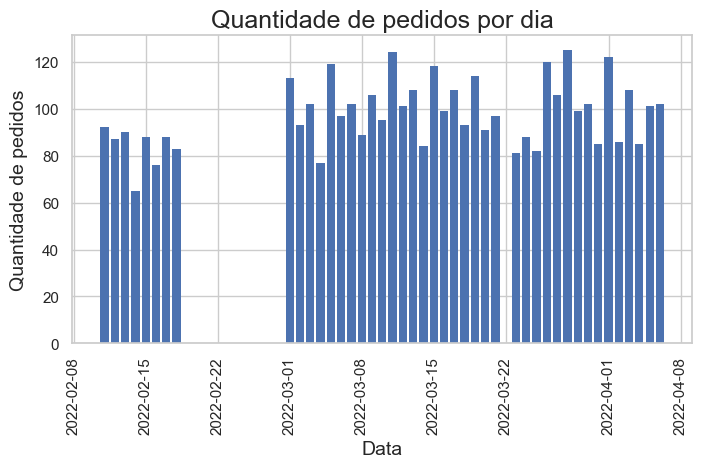

In [181]:
# Desenhar gráfico de barras
plt.figure(figsize=(8, 4))
plt.title("Quantidade de pedidos por dia")
plt.xticks(rotation=90)
plt.xlabel("Data")
plt.ylabel("Quantidade de pedidos")
fig = plt.bar(df["Day_Ordered"], df["ID"])
plt.show()

### 2. Quantidade de pedidos por semana.

In [182]:
# Agrupar dias em semanas do ano
df_aux["Week_Ordered"] = pd.to_datetime(df_aux["Day_Ordered"]).dt.strftime("%W")
df = df_aux[["Week_Ordered", "ID"]].pivot_table(index="Week_Ordered", aggfunc="sum").reset_index()

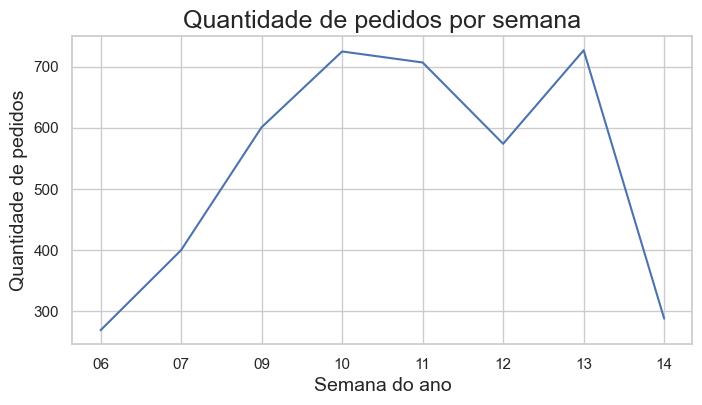

In [183]:
# Desenhar gráfico de linha
plt.figure(figsize=(8, 4))
plt.title("Quantidade de pedidos por semana")
plt.xlabel("Semana do ano")
plt.ylabel("Quantidade de pedidos")
fig = plt.plot(df["Week_Ordered"], df["ID"])
plt.show()

### 3. Distribuição dos pedidos por densidade de tráfego

In [184]:
# Agrupar por densidade de tráfego
df = df_clear[["ID", "Road_traffic_density"]].groupby("Road_traffic_density").count().reset_index()
# Calcular porcentagem
df["percent"] = df["ID"] / df["ID"].sum()

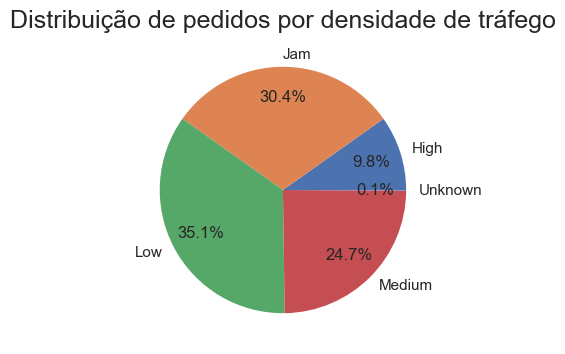

In [185]:
# Desenhar gráfico de pizza
plt.figure(figsize=(8, 4))
plt.title("Distribuição de pedidos por densidade de tráfego")
fig = plt.pie(df["percent"], labels=df["Road_traffic_density"], autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.1)
plt.show()

### 4. Comparação de volume de pedidos por tipo de cidade e densidade de tráfego

In [186]:
# Agrupar por cidade e densidade de tráfego
df = df_clear[["ID", "City", "Road_traffic_density"]].groupby(["City", "Road_traffic_density"]).count().reset_index()
# Pivotar os dados para criar um DataFrame mais adequado para o tipo de gráfico
df = df.pivot(index="City", columns="Road_traffic_density", values="ID").fillna(0)

<Figure size 800x400 with 0 Axes>

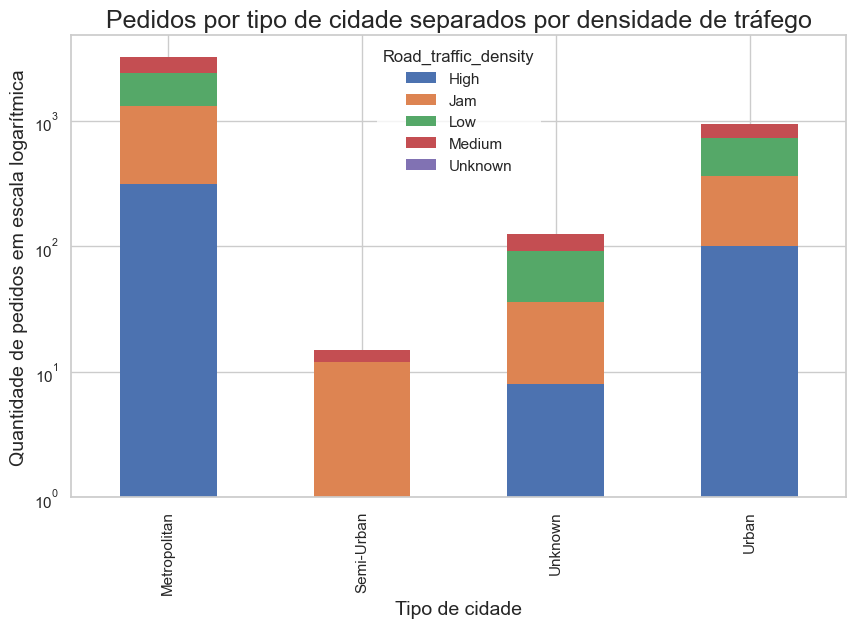

In [187]:
# Criar gráfico de bolhas
plt.figure(figsize=(8, 4))
fig = df.plot(kind="bar", stacked=True, figsize=(10, 6))
fig.set_title("Pedidos por tipo de cidade separados por densidade de tráfego")
fig.set_xlabel("Tipo de cidade")
fig.set_ylabel("Quantidade de pedidos em escala logarítmica")
# Escala logarítmica para melhor visualização
fig.set_yscale('log')
plt.show()

### 5. Quantidade de pedidos por entregador por semana

In [188]:
df= df_aux[["ID", "Delivery_person_ID", "Week_Ordered"]]

In [189]:
df_aux

,Time_Ordered,ID,Delivery_person_ID,Day_Ordered,Week_Ordered
0,2022-02-11 00:00:00,1,1,2022-02-11,06
1,2022-02-11 08:20:00,1,1,2022-02-11,06
2,2022-02-11 08:30:00,2,2,2022-02-11,06
3,2022-02-11 08:40:00,1,1,2022-02-11,06
4,2022-02-11 08:55:00,1,1,2022-02-11,06
...,...,...,...,...,...
2873,2022-04-06 23:35:00,2,2,2022-04-06,14
2874,2022-04-06 23:40:00,2,2,2022-04-06,14
2875,2022-04-06 23:45:00,1,1,2022-04-06,14
2876,2022-04-06 23:50:00,1,1,2022-04-06,14


In [179]:
df_clear

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Ordered,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Restaurant_location,Delivery_location,Time_Order_delivered
0,0x4607,INDORES13DEL02,37,4.9,2022-03-19 11:30:00,2022-03-19 11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,"(22.745049, 75.892471)","(22.765049, 75.912471)",2022-03-19 12:09:00
1,0xb379,BANGRES18DEL02,34,4.5,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitan,"(12.913041, 77.683237)","(13.043041, 77.813237)",2022-03-25 20:23:00
2,0x5d6d,BANGRES19DEL01,23,4.4,2022-03-19 08:30:00,2022-03-19 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,"(12.914264, 77.6784)","(12.924264, 77.6884)",2022-03-19 09:11:00
3,0x7a6a,COIMBRES13DEL02,38,4.7,2022-04-05 18:00:00,2022-04-05 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitan,"(11.003669, 76.976494)","(11.053669, 77.026494)",2022-04-05 18:31:00
4,0x70a2,CHENRES12DEL01,32,4.6,2022-03-26 13:30:00,2022-03-26 13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitan,"(12.972793, 80.249982)","(13.012793, 80.289982)",2022-03-26 14:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,0xdec8,KOCRES16DEL03,30,4.8,2022-02-11 20:45:00,2022-02-11 20:50:00,Sunny,Jam,0,Meal,motorcycle,0,No,Metropolitan,"(10.003064, 76.307589)","(10.033064, 76.337589)",2022-02-11 21:12:00
4287,0xdd08,KOCRES03DEL03,34,4.9,2022-02-17 20:50:00,2022-02-17 20:55:00,Sunny,Jam,1,Drinks,motorcycle,0,No,Metropolitan,"(10.020683, 76.310631)","(10.050683, 76.340631)",2022-02-17 21:18:00
4288,0x2226,SURRES16DEL03,34,4.8,2022-04-01 17:25:00,2022-04-01 17:30:00,Cloudy,Medium,1,Meal,motorcycle,1,No,Metropolitan,"(21.160437, 72.774209)","(21.220437, 72.834209)",2022-04-01 17:47:00
4289,0xdf39,BHPRES04DEL02,37,4.8,2022-02-16 22:30:00,2022-02-16 22:40:00,Sandstorms,Low,2,Meal,electric_scooter,1,No,Urban,"(23.184992, 77.417227)","(23.264992, 77.497227)",2022-02-16 23:06:00
